In [1]:
import numpy as np
from pyannote.core import Segment
from sklearn.metrics import roc_curve

from pyannote.audio.pipelines.speaker_diarization import SpeakerDiarization

# Load the pre-trained model
pipeline = SpeakerDiarization.from_pretrained(
    "pyannote/speaker-diarization-3.1", 
)
import torch
pipeline.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Run diarization
ground_truth = pipeline("../data/sample.wav")

with open("sample.rttm", "w") as f:
    ground_truth.write_rttm(f)

/raid/home/rajivratn/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
/raid/home/rajivratn/.local/lib/python3.10/site-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/raid/home/rajivratn/.local/

In [2]:
# To calculate DER score.
import sys
sys.path.append('../utils/dscore')

from ref.dscore import score

## To compare how the model is behaving with overlapping audios

Scoring...


DER for SNR value 1: 94.7418


Scoring...


DER for SNR value 2: 92.2767


Scoring...


DER for SNR value 4: 87.3328


Scoring...


DER for SNR value 8: 76.8445


Scoring...


DER for SNR value 16: 35.5716


Scoring...


DER for SNR value 21: 19.1239


Scoring...


DER for SNR value 22: 16.5705


Scoring...


DER for SNR value 23: 14.5702


Scoring...


DER for SNR value 24: 11.9499
DER for SNR value 25: 9.3359


Scoring...


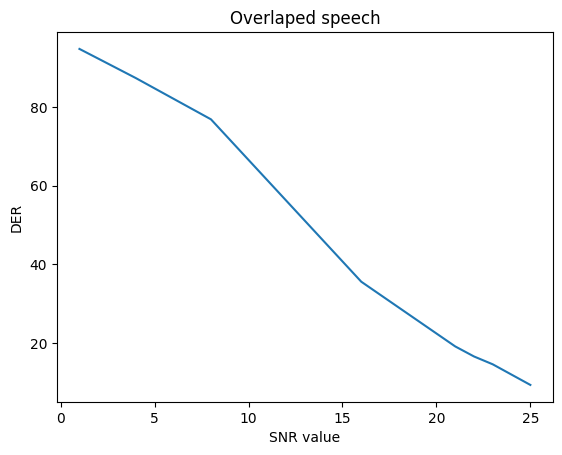

In [3]:
import matplotlib.pyplot as plt

out = {}
for snr in range(10):
    if snr < 5: 
        snr = 2**snr
    else: 
        snr = 16 + snr
        
    hypothesis = pipeline(f"../data/oa/noisy_sample_snr{snr}.wav")
    with open("ref.rttm", "w") as f:
        hypothesis.write_rttm(f)
    
    der = score.mai("sample.rttm", "ref.rttm")[0][0][1]
    out[snr] = der
    print(f"DER for SNR value {snr}: {der:.4f}")
    
plt.plot(list(out.keys()), list(out.values()))
plt.xlabel("SNR value")
plt.ylabel("DER")
plt.title("Overlaped speech")
plt.savefig("oaeer.png")

## To compare how the model is behaving with overlapping noises

Scoring...


EER for SNR value 1: 6.0413


Scoring...


EER for SNR value 2: 5.5674


Scoring...


EER for SNR value 4: 4.9993


Scoring...


EER for SNR value 8: 4.3430


Scoring...


EER for SNR value 16: 3.7523


Scoring...


EER for SNR value 21: 2.7244


Scoring...


EER for SNR value 22: 2.5735


Scoring...


EER for SNR value 23: 2.2685


Scoring...


EER for SNR value 24: 2.2621
EER for SNR value 25: 1.8655


Scoring...


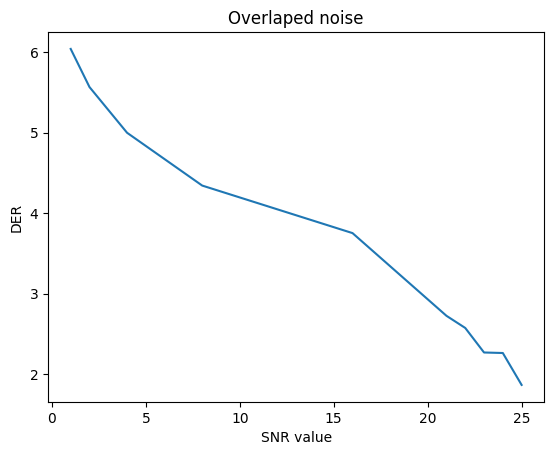

In [4]:
out = {}
for snr in range(10):
    if snr < 5: 
        snr = 2**snr
    else: 
        snr = 16 + snr
    hypothesis = pipeline(f"../data/na/noisy_sample_snr{snr}.wav")
    with open("ref.rttm", "w") as f:
        hypothesis.write_rttm(f)
    
    der = score.mai("sample.rttm", "ref.rttm")[0][0][1]
    out[snr] = der
    print(f"EER for SNR value {snr}: {der:.4f}")

plt.plot(list(out.keys()), list(out.values()))
plt.xlabel("SNR value")
plt.ylabel("DER")
plt.title("Overlaped noise")
plt.savefig("oneer.png")